<a href="https://colab.research.google.com/github/Apaulgithub/oibsip_task1/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Vital Libraries


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')



### Dataset entry

In [81]:
df = pd.read_csv(r"C:\Users\wow99\Downloads\Iris.csv")

### Dataset First View

In [82]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Rows & Columns count

In [83]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  6


### Dataset Information

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Duplicate Values

In [85]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values/Null Values

In [86]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [87]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [88]:
df.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


### Check Unique Values for each variable.

In [89]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [90]:
data=df.iloc[:,1:]

In [91]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##  Data Vizualization

#### Chart - 1 : Distribution of Numerical Variables

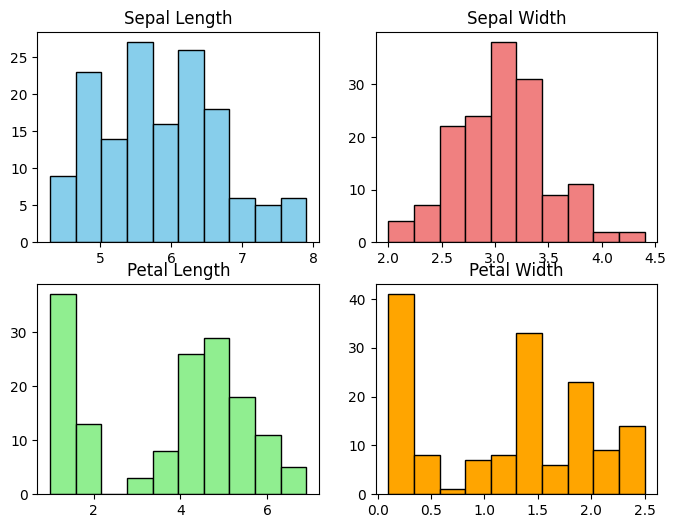

In [92]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.hist(data['SepalLengthCm'], color='skyblue', edgecolor='black')
plt.title('Sepal Length')

plt.subplot(2, 2, 2)
plt.hist(data['SepalWidthCm'], color='lightcoral', edgecolor='black')
plt.title('Sepal Width')
plt.subplot(2, 2, 3)
plt.hist(data['PetalLengthCm'], color='lightgreen', edgecolor='black')
plt.title('Petal Length')
plt.subplot(2, 2, 4)
plt.hist(data['PetalWidthCm'], color='orange', edgecolor='black')
plt.title('Petal Width')
plt.show()

#### Chart - 2 : Sepal Length vs Sepal Width

In [93]:
colors = ['blue', 'orange', 'purple']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


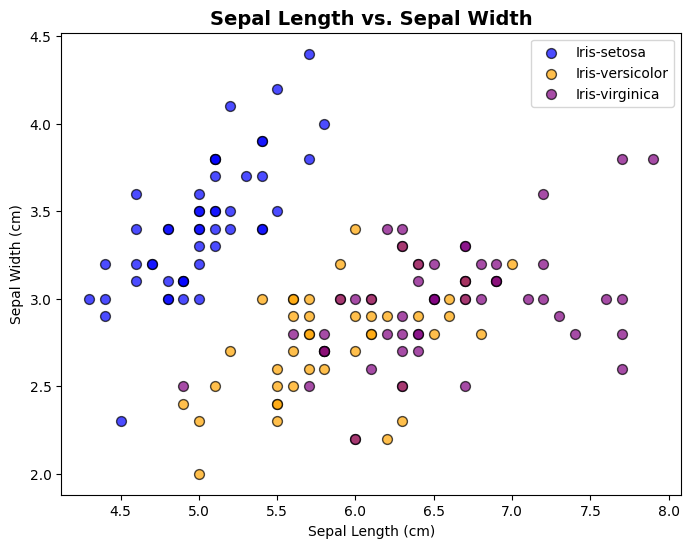

In [94]:
plt.figure(figsize=(8, 6))
for i in range(3):
    species_data = data[data['Species'] == species[i]]
    plt.scatter(species_data['SepalLengthCm'], species_data['SepalWidthCm'], 
                color=colors[i], label=species[i], edgecolors='black', s=50, alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs. Sepal Width', fontsize=14, fontweight='bold')
plt.legend()
plt.show()


#### Chart - 3 : Petal Length vs Petal Width

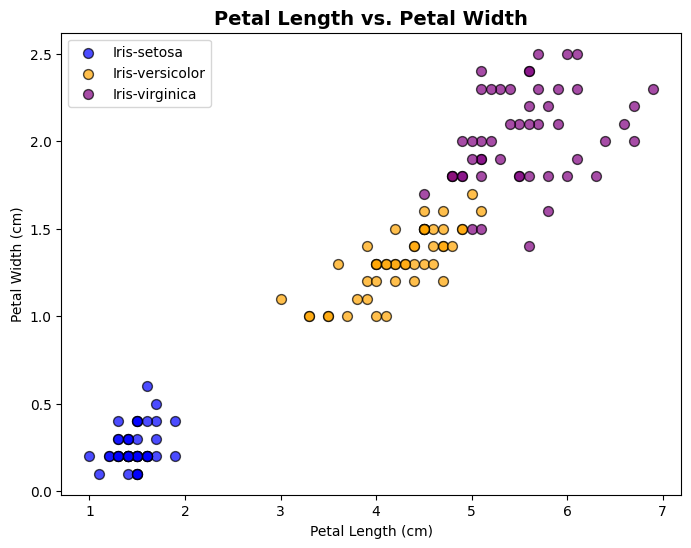

In [95]:
plt.figure(figsize=(8, 6))
for i in range(3):
    species_data = data[data['Species'] == species[i]]
    plt.scatter(species_data['PetalLengthCm'], species_data['PetalWidthCm'], 
                color=colors[i], label=species[i], edgecolors='black', s=50, alpha=0.7)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs. Petal Width', fontsize=14, fontweight='bold')
plt.legend()
plt.show()


#### Chart - 4 : Sepal Length vs Petal Length

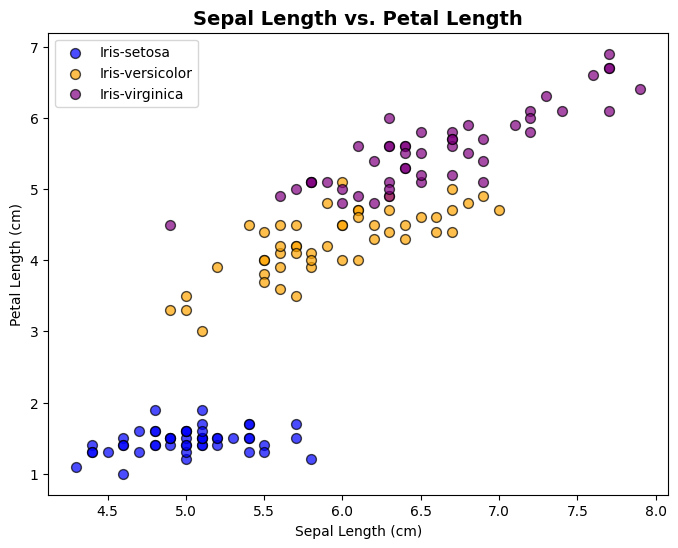

In [96]:
plt.figure(figsize=(8, 6))
for i in range(3):
    species_data = data[data['Species'] == species[i]]
    plt.scatter(species_data['SepalLengthCm'], species_data['PetalLengthCm'], 
                color=colors[i], label=species[i], edgecolors='black', s=50, alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs. Petal Length', fontsize=14, fontweight='bold')
plt.legend()
plt.show()


#### Chart - 5 : Sepal Width vs Petal Width

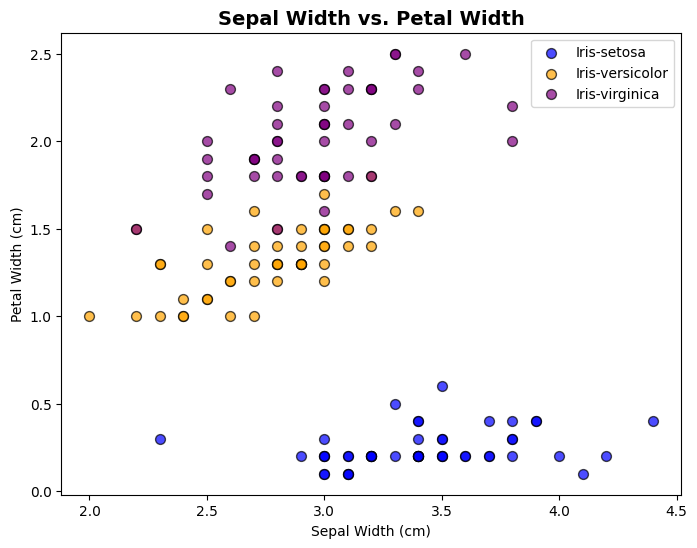

In [97]:
plt.figure(figsize=(8, 6))
for i in range(3):
    species_data = data[data['Species'] == species[i]]
    plt.scatter(species_data['SepalWidthCm'], species_data['PetalWidthCm'], 
                color=colors[i], label=species[i], edgecolors='black', s=50, alpha=0.7)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Sepal Width vs. Petal Width', fontsize=14, fontweight='bold')
plt.legend()
plt.show()



Why Do We Create These Scatter Plots?
The goal of scatter plots in the Iris dataset is to visually analyze relationships between different flower measurements (sepal length, sepal width, petal length, petal width) and identify patterns between species.

1 Sepal Length vs Sepal Width :
Helps see how sepal size varies across species.

Some species may have more overlapping sepals than others.

2 Petal Length vs Petal Width :
Strongest separation between species.

Petal size varies more significantly, making species easier to classify.

3 Sepal Length vs Petal Length :
Shows how petal size changes with sepal size.

Some species may have long sepals & long petals, while others don’t.

4 Sepal Width vs Petal Width :
Helps explore flower shape characteristics.

May reveal some clustering patterns between species.

#### Chart - 6 : Correlation Heatmap

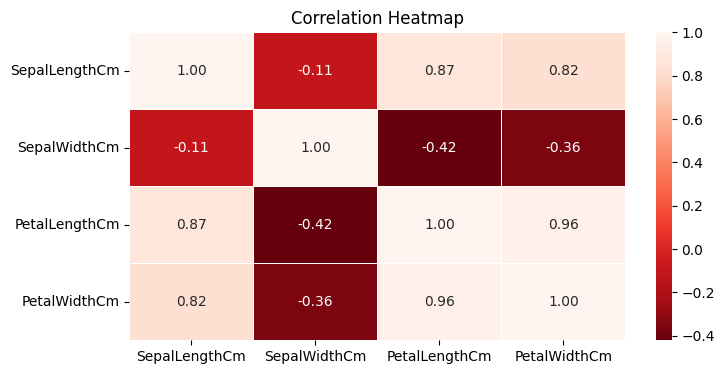

In [98]:

corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



### 1. ordinal Encoding

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
print("Encoded Species Values:", data['Species'].unique())  



Encoded Species Values: [0 1 2]


### 2. Data transformation 

In [100]:
# Defining the X and y
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

### 3. Data partitioning

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [102]:
y_train.value_counts()

Species
2    36
1    35
0    34
Name: count, dtype: int64

## Model Performance Evaluator

In [103]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    sns.heatmap(cm_train, annot=True, cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")
    sns.heatmap(cm_test, annot=True, cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")
    plt.tight_layout()
    plt.show()
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']
    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']
    return [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test]


In [104]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

### ML Model 1: Decision Tree

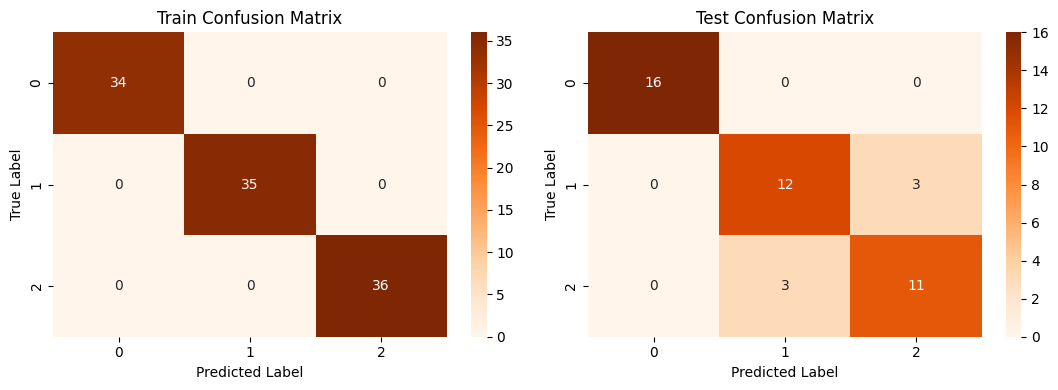

In [105]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=20)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
dt_results = evaluate_model(dt_model, x_train, x_test, y_train, y_test)


In [106]:
score['Decision Tree'] = dt_score
score

,Decision Tree
Precision Train,1.000000
Precision Test,0.935026
Recall Train,1.000000
Recall Test,0.933333
Accuracy Train,1.000000
Accuracy Test,0.933333
F1 macro Train,1.000000
F1 macro Test,0.933493


#### 2. Model Validation & Best Parameter Selection

In [107]:
grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': np.arange(2, 8),
}
model = DecisionTreeClassifier(random_state=0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
random_search = RandomizedSearchCV(model, grid, cv=skf, n_iter=10, random_state=0)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)



Best hyperparameters: {'min_samples_split': np.int64(3), 'max_depth': 8}


In [108]:
dt_model2 = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=20
)


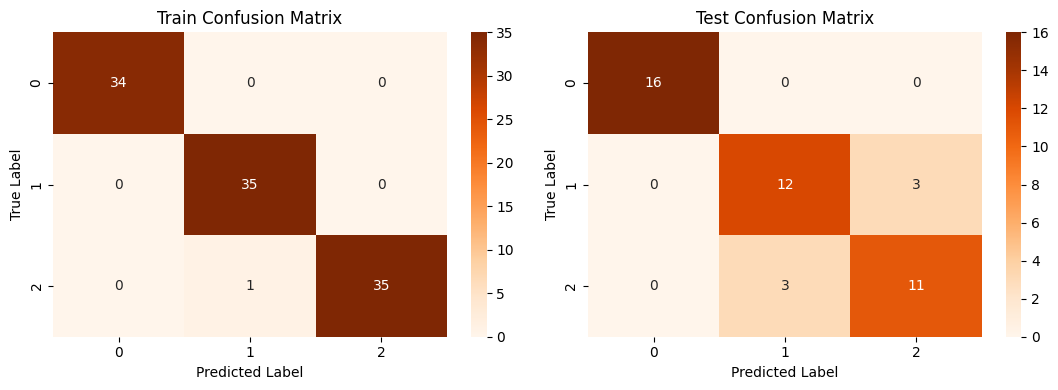

In [109]:
dt_model2.fit(x_train, y_train)
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)


In [110]:
score['Decision Tree tuned'] = dt2_score

In [111]:
score

,Decision Tree,Decision Tree tuned
Precision Train,1.000000,0.990741
Precision Test,0.935026,0.866667
Recall Train,1.000000,0.990476
Recall Test,0.933333,0.866667
Accuracy Train,1.000000,0.990476
Accuracy Test,0.933333,0.866667
F1 macro Train,1.000000,0.990476
F1 macro Test,0.933493,0.866667


### ML Model - 2 : Random Forest

In [112]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

#### 1. Explaination using metrix 

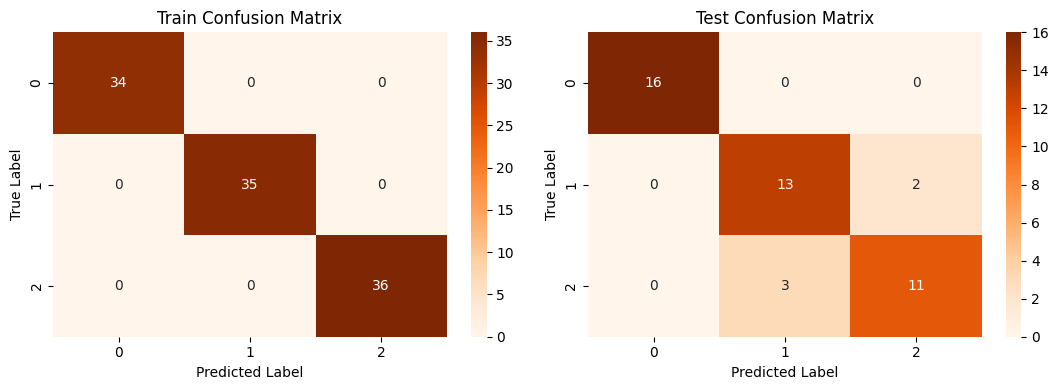

In [113]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [114]:
score['Random Forest'] = rf_score
score

,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,1.000000,0.990741,1.000000
Precision Test,0.935026,0.866667,0.889637
Recall Train,1.000000,0.990476,1.000000
Recall Test,0.933333,0.866667,0.888889
Accuracy Train,1.000000,0.990476,1.000000
Accuracy Test,0.933333,0.866667,0.888889
F1 macro Train,1.000000,0.990476,1.000000
F1 macro Test,0.933493,0.866667,0.888623


#### 2.Model Validation & Best Parameter Selection

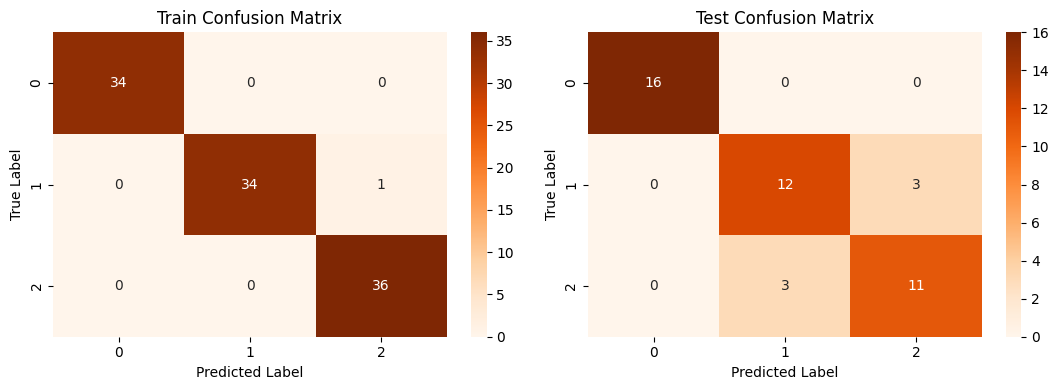

In [115]:
grid = {'n_estimators': [10, 50, 100, 200],
        'max_depth': range(8, 16),
        'min_samples_split': range(2, 6)}
rf = RandomForestClassifier(random_state=0)
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)
random_search = RandomizedSearchCV(rf, grid, cv=rskf, n_iter=10, n_jobs=-1)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
best_rf = RandomForestClassifier(**best_params, random_state=0)
best_rf.fit(x_train, y_train)
y_pred_rf = best_rf.predict(x_test)
rf_score = evaluate_model(best_rf, x_train, x_test, y_train, y_test)


In [116]:
rf_model2 = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                   min_samples_split=best_params['min_samples_split'],
                                   max_depth=best_params['max_depth'],
                                   random_state=0)


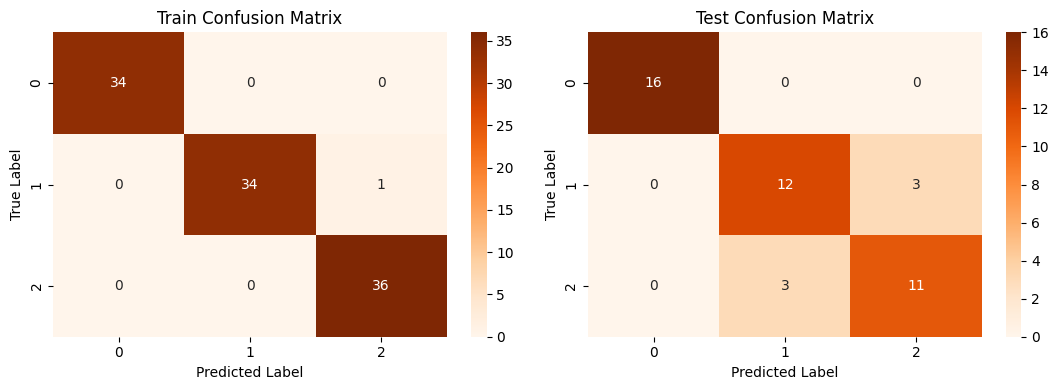

In [117]:
rf_model2.fit(x_train, y_train)
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)


In [118]:
score['Random Forest tuned'] = rf2_score

In [119]:
score

,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,1.000000,0.990741,1.000000,0.990734
Precision Test,0.935026,0.866667,0.889637,0.866667
Recall Train,1.000000,0.990476,1.000000,0.990476
Recall Test,0.933333,0.866667,0.888889,0.866667
Accuracy Train,1.000000,0.990476,1.000000,0.990476
Accuracy Test,0.933333,0.866667,0.888889,0.866667
F1 macro Train,1.000000,0.990476,1.000000,0.990472
F1 macro Test,0.933493,0.866667,0.888623,0.866667


### 3.Predicting Iris Species Based on Input Features

In [120]:
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [121]:
# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])
# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]
# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa
